You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


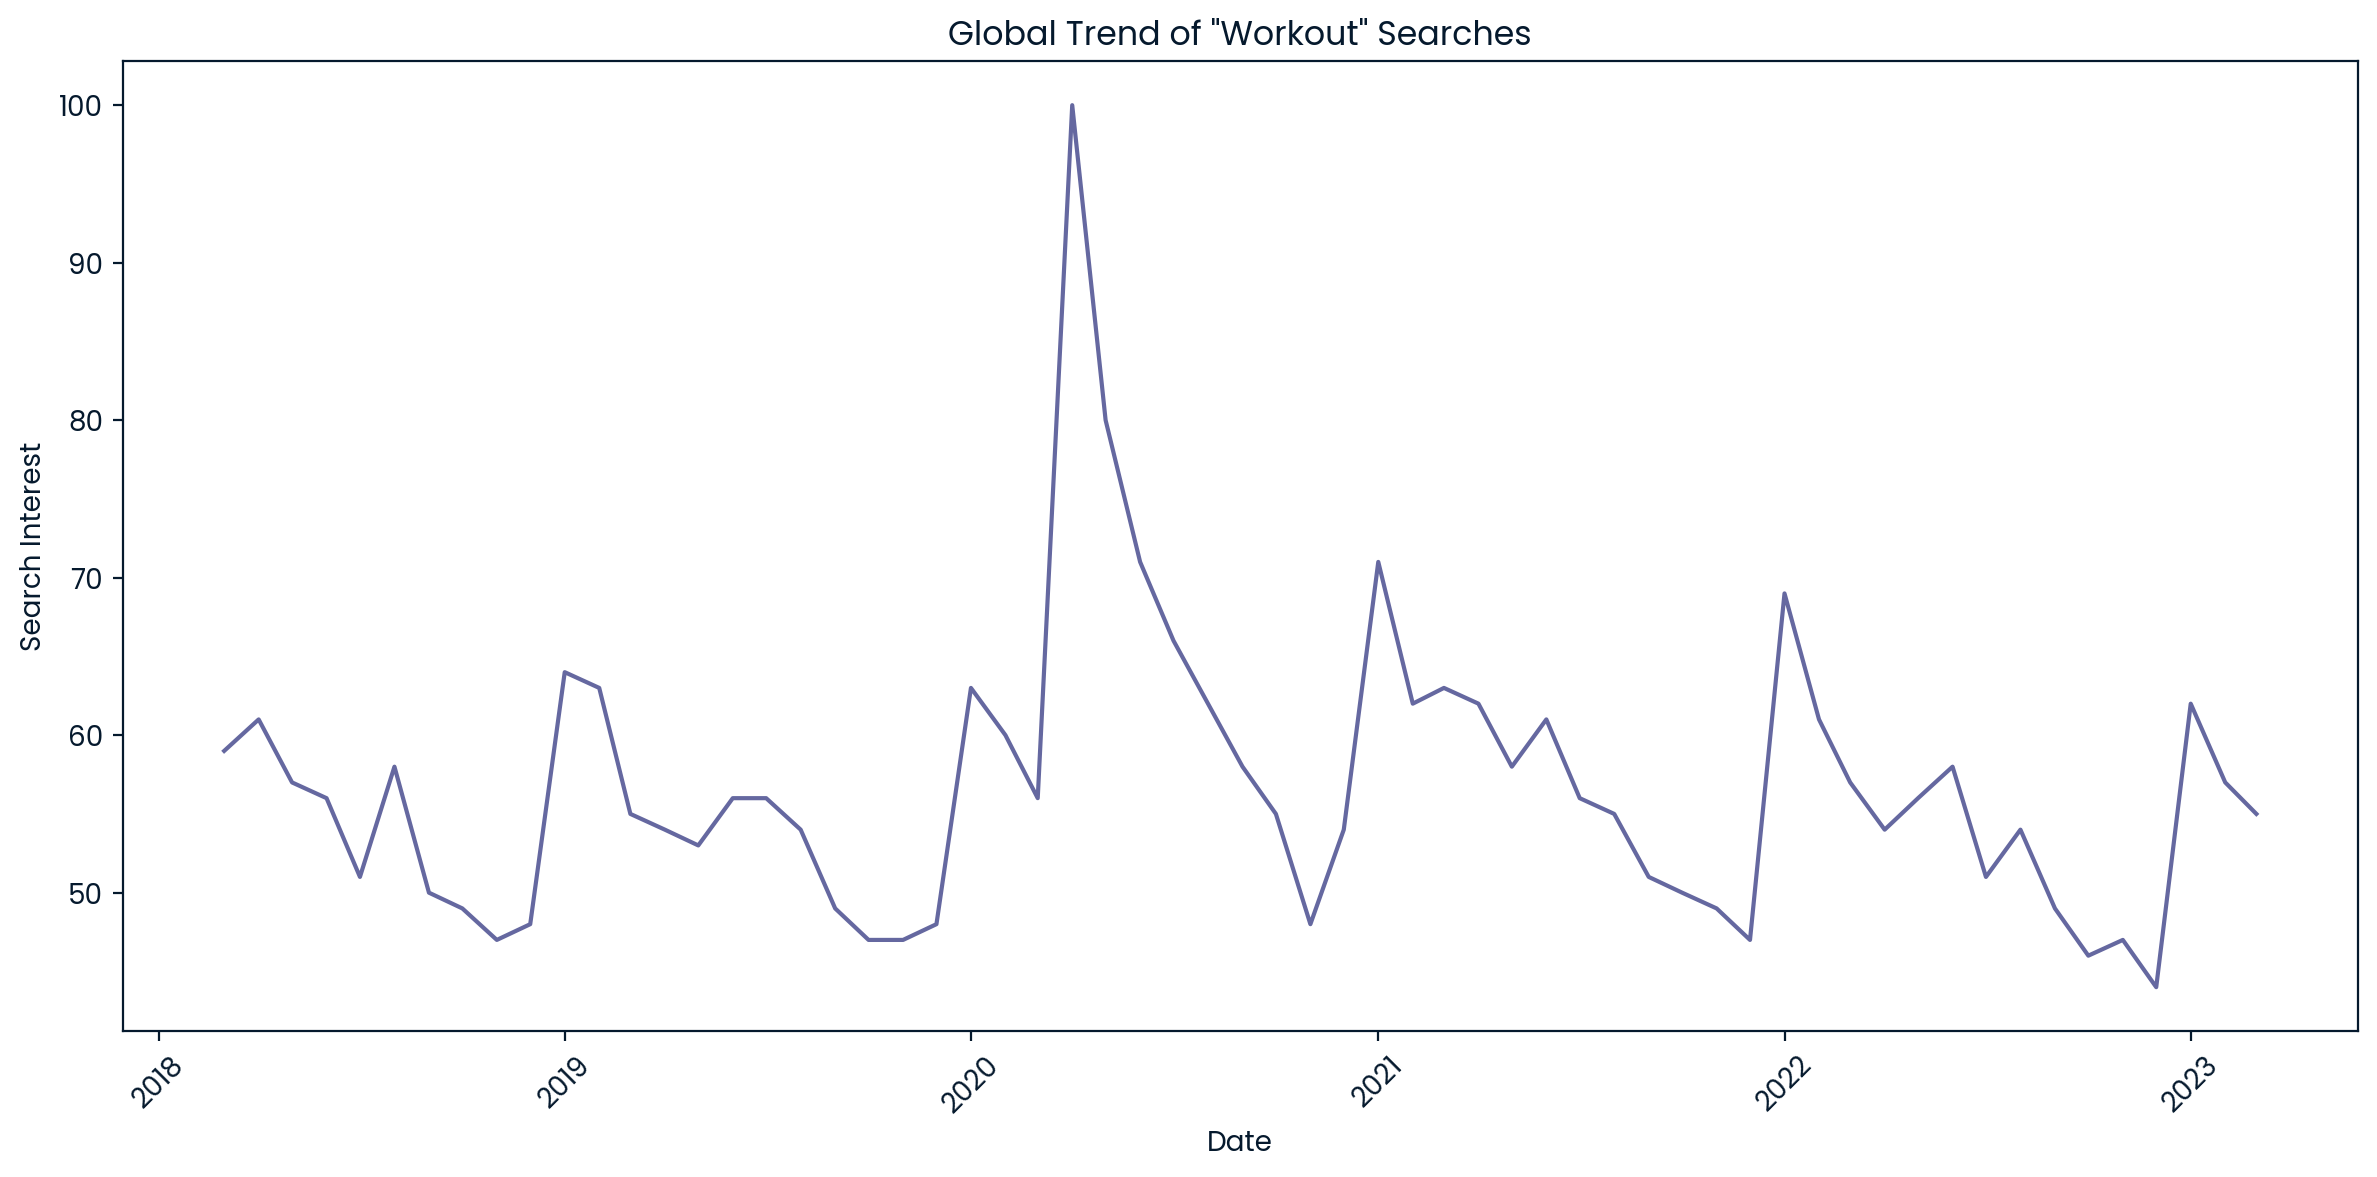

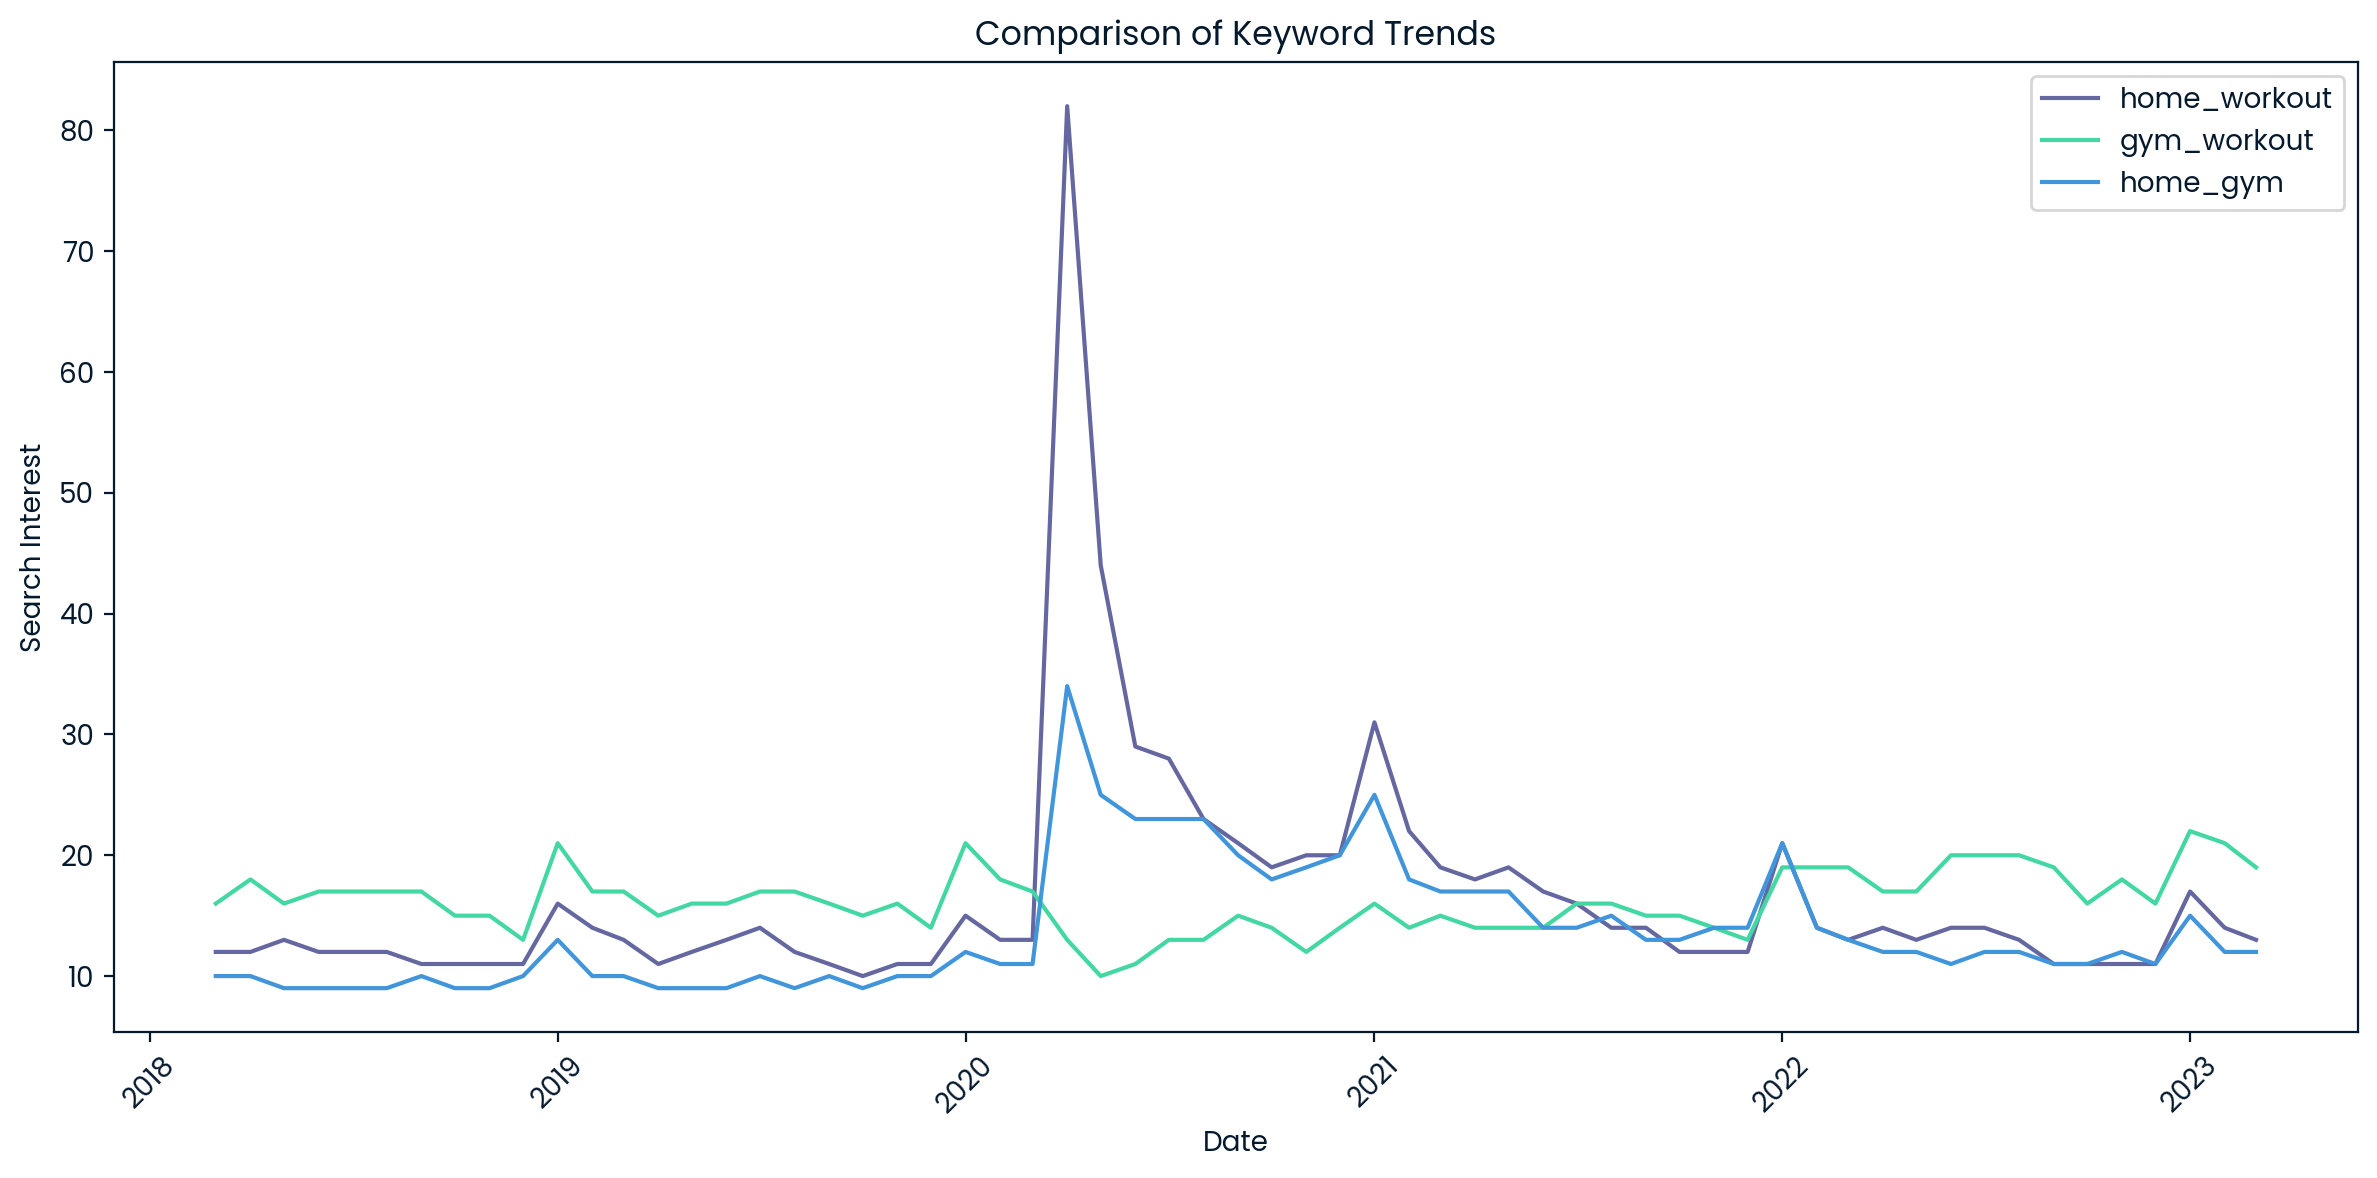

Year of peak interest in 'workout': 2020
Most popular keyword during COVID: home_workout
Most popular keyword currently: gym_workout
Country with highest interest in workouts: United States
Country with highest interest in home workouts (Philippines vs Malaysia): Philippines


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
workout = pd.read_csv('data/workout.csv')
three_keywords = pd.read_csv('data/three_keywords.csv')
workout_geo = pd.read_csv('data/workout_geo.csv')
three_keywords_geo = pd.read_csv('data/three_keywords_geo.csv')

workout_geo.columns = workout_geo.columns.str.lower()
three_keywords_geo.columns = three_keywords_geo.columns.str.lower()
# 1. When was the global search for 'workout' at its peak?
peak_workout = workout.loc[workout['workout_worldwide'].idxmax()]
year_str = str(pd.to_datetime(peak_workout['month']).year)

# 2. Most popular keyword during COVID and currently
three_keywords['month'] = pd.to_datetime(three_keywords['month'])
covid_period = three_keywords[(three_keywords['month'] >= '2020-03-01') & (three_keywords['month'] <= '2021-12-31')]
peak_covid = covid_period.iloc[:, 1:].sum().idxmax().replace('_worldwide', '')

current_period = three_keywords[three_keywords['month'] >= '2023-01-01']
current = current_period.iloc[:, 1:].sum().idxmax().replace('_worldwide', '')

# 3. Country with highest interest in workouts
countries_of_interest = ['United States', 'Australia', 'Japan']
top_country = workout_geo.loc[workout_geo['country'].isin(countries_of_interest), 'workout_2018_2023'].idxmax()
top_country = workout_geo.loc[top_country, 'country']

# 4. Country with highest interest in home workouts between Philippines and Malaysia
home_workout_geo = three_keywords_geo.loc[three_keywords_geo['country'].isin(['Philippines', 'Malaysia']), 'home_workout_2018_2023'].idxmax()
home_workout_geo = three_keywords_geo.loc[home_workout_geo, 'country']

# Visualization: Global trend of 'workout' searches
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(workout['month']), workout['workout_worldwide'])
plt.title('Global Trend of "Workout" Searches')
plt.xlabel('Date')
plt.ylabel('Search Interest')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Comparison of keyword trends
plt.figure(figsize=(12, 6))
for column in three_keywords.columns[1:]:
    plt.plot(three_keywords['month'], three_keywords[column], label=column.replace('_worldwide', ''))
plt.title('Comparison of Keyword Trends')
plt.xlabel('Date')
plt.ylabel('Search Interest')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print results
print(f"Year of peak interest in 'workout': {year_str}")
print(f"Most popular keyword during COVID: {peak_covid}")
print(f"Most popular keyword currently: {current}")
print(f"Country with highest interest in workouts: {top_country}")
print(f"Country with highest interest in home workouts (Philippines vs Malaysia): {home_workout_geo}")